# Домашнее задание
1. Для своего ряда (см. папку Данные на de.unecon) определите наилучшую адаптивную модель прогнозирования. Для этого загрузите данные и отобразите их на графике. Есть ли в ряде тренд, сезонность?
2. С помощью библиотеки statsmodels обучите выбранную модель и постройте прогноз. Отобразите результат на графике.
3. Вычислите среднеквадратичную ошибку для оценки качества аппроксимации.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
с

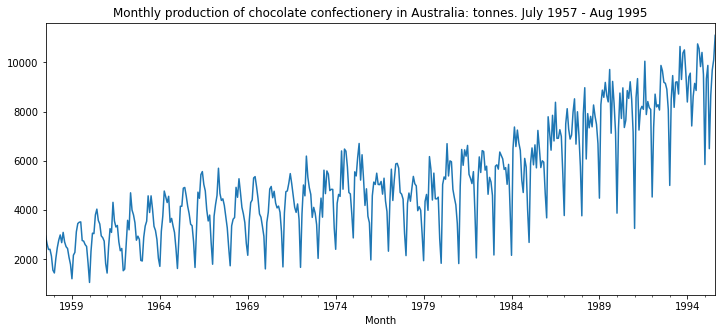

In [3]:
choco.plot(figsize=(12,5))
plt.title('Monthly production of chocolate confectionery in Australia: tonnes. July 1957 - Aug 1995')
plt.show()

Временной ряд обладает трендом и  сезонностью, которые должны быть учтены при построении моделей прогнозирования. Наличие тренда и сезонности проявляется на коррелограмме. 

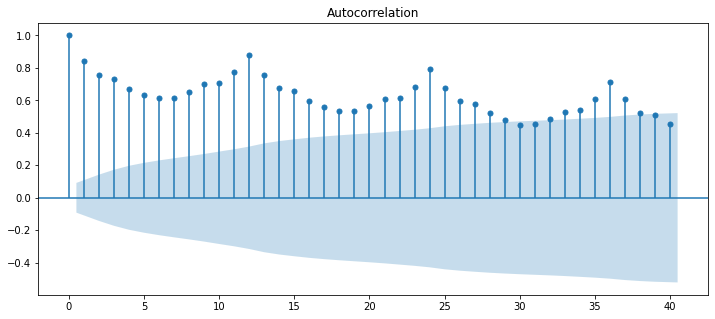

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(choco, lags=40, ax=ax)
plt.show()

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
choco.index = pd.DatetimeIndex(choco.index, freq='MS')

In [7]:
holt_wint = ExponentialSmoothing(choco, trend='add',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


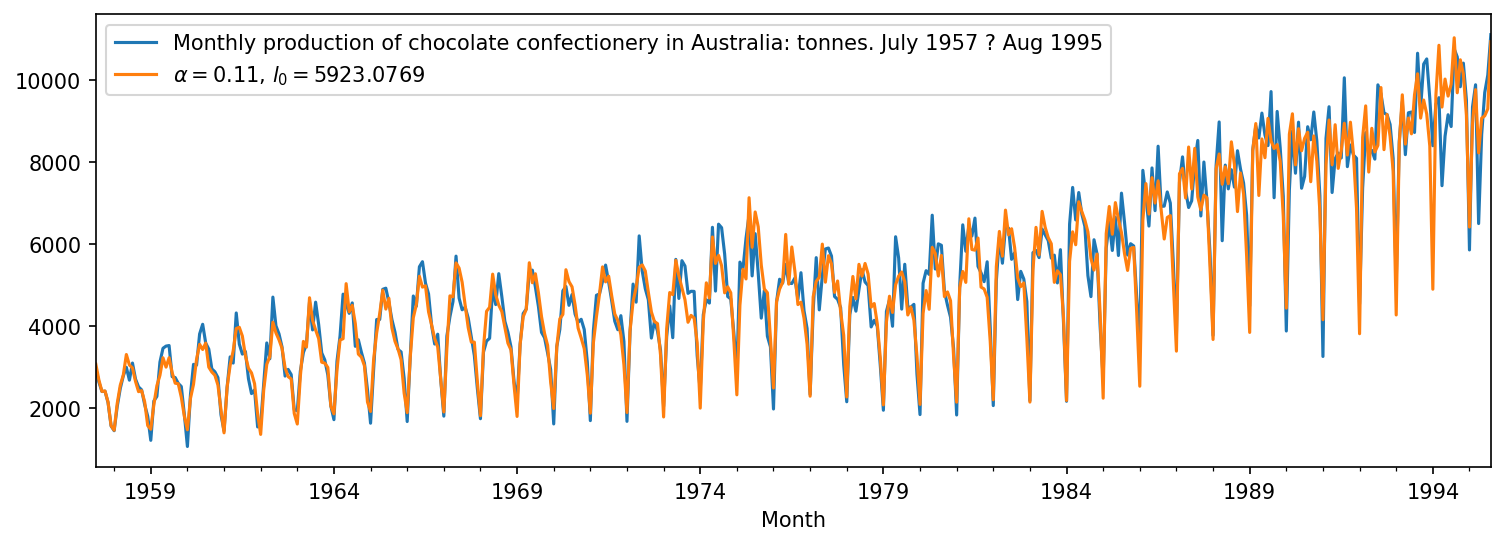

In [8]:
plt.figure(figsize=(12,4), dpi=150)
choco.plot(legend=True)
holt_wint.fittedvalues.rename(r'$\alpha=%.2f$' % holt_wint.model.params['smoothing_level'] + ', ' +
                    r'$l_0=%.4f$' % holt_wint.model.params['initial_level']).plot(legend=True)
plt.show()

Сделаем прогноз на год вперед

In [9]:
forecast = holt_wint.forecast(12)

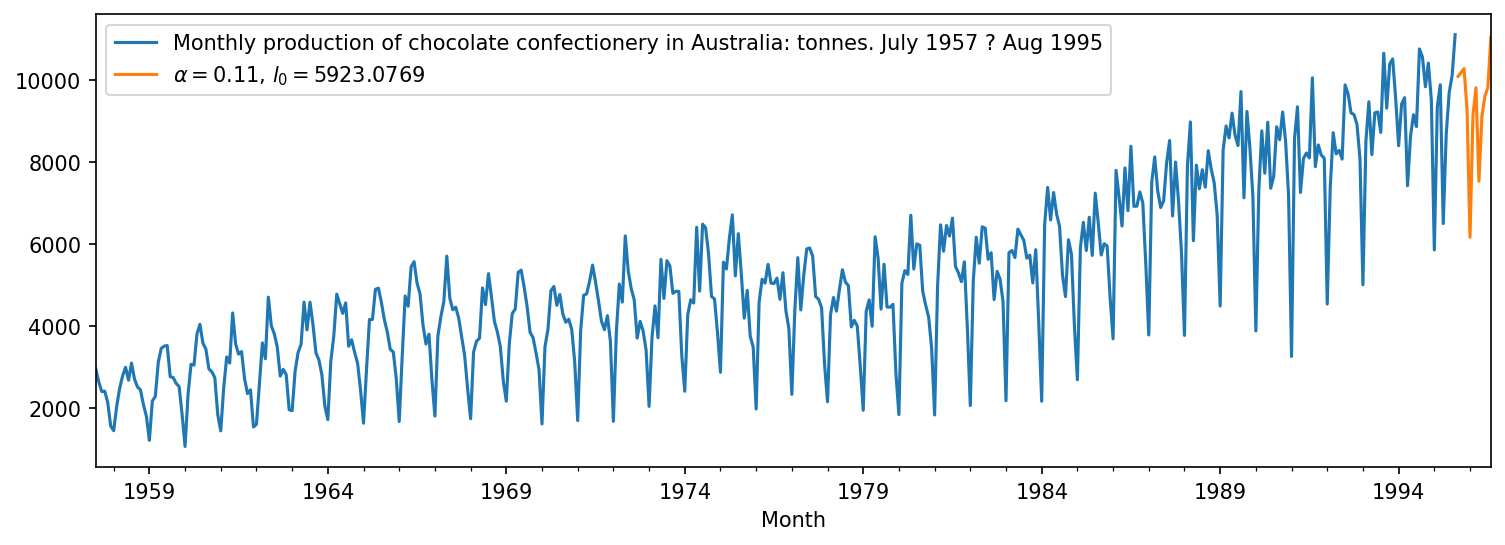

In [10]:
plt.figure(figsize=(12,4), dpi=150)
choco.plot(legend=True)
forecast .rename(r'$\alpha=%.2f$' % holt_wint.model.params['smoothing_level'] + ', ' +
                    r'$l_0=%.4f$' % holt_wint.model.params['initial_level']).plot(legend=True)
plt.show()

Вычислим среднеквадратичную ошибку для оценки качества аппроксимации.

In [11]:
y_pred=holt_wint.fittedvalues.values
y_real=choco.values

In [12]:
((y_real- y_pred) ** 2).mean()

301576.7277316011